In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
# import sys
# import os
# py_file_location = "/content/drive/MyDrive/liver-imaging-analysis/engine"
# sys.path.append(os.path.abspath(py_file_location))
# !pip install monai
!pip install -U scikit-image


In [ ]:
!pip install torchvision
!pip install torch
!pip install matplotlib

In [ ]:
!pip install 'monai[all]'


Data Status
-------------------------------
volume path: C:/Users/BMATM-2023/Desktop/Single Dataset/volume\liver-orig010.nii mask path: C:/Users/BMATM-2023/Desktop/Single Dataset/mask\liver-seg010.nii
Batch Shape of Training Features: (1, 1, 256, 256, 64) torch.float32
Batch Shape of Training Labels: (1, 1, 256, 256, 64) torch.float32
Used Device: cuda

Training
-------------------------------
Epoch 1
-------------------------------
volume path: C:/Users/BMATM-2023/Desktop/Single Dataset/volume\liver-orig010.nii mask path: C:/Users/BMATM-2023/Desktop/Single Dataset/mask\liver-seg010.nii


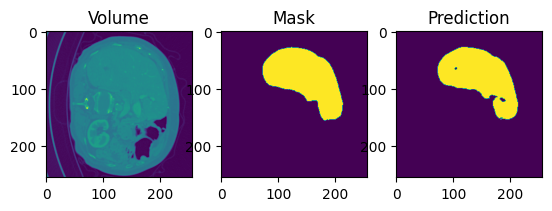

loss: 0.043052        [    1/    2]
volume path: C:/Users/BMATM-2023/Desktop/Single Dataset/volume\liver-orig015.nii mask path: C:/Users/BMATM-2023/Desktop/Single Dataset/mask\liver-seg015.nii


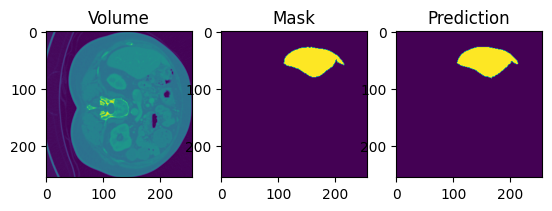

loss: 0.030117        [    2/    2]
 TOTAL LOSS =  [0.036584705114364624]
-------------------------------


In [1]:
import unet
import losses
import nibabel
import engine
import torch
import json
from torch import nn
import diceloss

device = "cuda" if torch.cuda.is_available() else "cpu"
# device= "cpu"
class NeuralNetwork(unet.UNet3D,engine.Engine):
    def __init__(self):
        engine.Engine.__init__(self,device=device)        
        unet.UNet3D.__init__(self,1,1,device=device)


with open('configs.json') as f:
    config = json.load(f)

model=NeuralNetwork().to(device)

#losses.LossFunctions.choose(config['loss_function']
#nn.BCEWithLogitsLoss()
model.compile(loss=diceloss.DiceLoss(), optimizer= torch.optim.Adam(model.parameters(),lr=config['optimizer']['learning_rate']), metrics=['dice_score','loss'])
# print("Compile Status")
# print("-------------------------------")
# model.compile_status()


model.load_data(dataset_path="C:/GP-Dr.Meena-LiverSeg/Test/",transformation_flag=True,transformation=config['transformation_size'],batchsize=config['batch_size'],test_valid_split=0)
print("\nData Status")
print("-------------------------------")
model.data_status()
model.load_state_dict(torch.load("C:/GP-Dr.Meena-LiverSeg/3D-Unet/engine/lastepch"))
print("\nTraining")
print("-------------------------------")
model.fit(epochs=config['epochs'])
# print("\nTesting")

print("-------------------------------")

# print("\nPrediction")
# print("-------------------------------")
# ImagePath=config['ImagePath']
# output=model.predict(ImagePath)
# output.shape


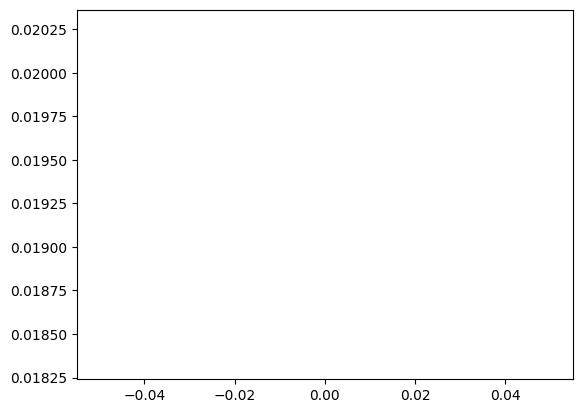

In [5]:
torch.save(model.state_dict(), 'BCEAug1')
import matplotlib.pyplot as plt
plt.plot(model.totalloss)